<a href="https://colab.research.google.com/github/abhiraman/ML_Algos/blob/main/Regression/Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/DS_Tasks

/content/drive/MyDrive/DS_Tasks


In [3]:
#!unzip archive.zip

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly


In [5]:
car_price_data = pd.read_csv("CarPrice_Assignment.csv")
car_price_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# How Do different Attributes effect the Pricing of a Car?

How do attributes with numbers effect the pricing?

In [6]:
float_variable_df = car_price_data.select_dtypes([np.float64,])
print(float_variable_df.head())
float_varied_cols = float_variable_df.columns
print("float_varied_cols :",list(float_varied_cols))

   wheelbase  carlength  carwidth  carheight  boreratio  stroke  \
0       88.6      168.8      64.1       48.8       3.47    2.68   
1       88.6      168.8      64.1       48.8       3.47    2.68   
2       94.5      171.2      65.5       52.4       2.68    3.47   
3       99.8      176.6      66.2       54.3       3.19    3.40   
4       99.4      176.6      66.4       54.3       3.19    3.40   

   compressionratio    price  
0               9.0  13495.0  
1               9.0  16500.0  
2               9.0  16500.0  
3              10.0  13950.0  
4               8.0  17450.0  
float_varied_cols : ['wheelbase', 'carlength', 'carwidth', 'carheight', 'boreratio', 'stroke', 'compressionratio', 'price']


In [7]:
def plot_attr_trend(df,col_list,car_price):
  #car_price = df["price"]
  df['price'] = car_price

  for i in col_list:
    if i=='price':continue
    plt.figure(figsize=(5,5))
    sns.scatterplot(data=df,x =i,y= 'price')


#plot_attr_trend()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


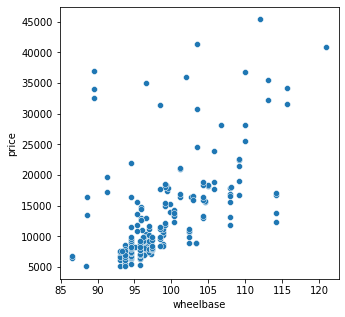

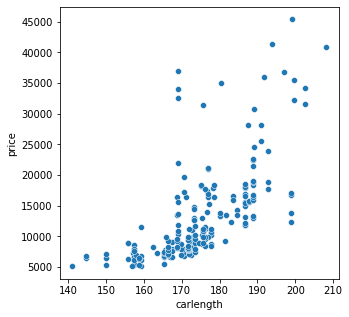

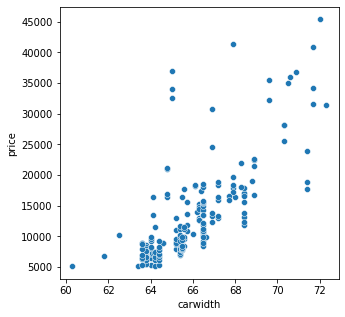

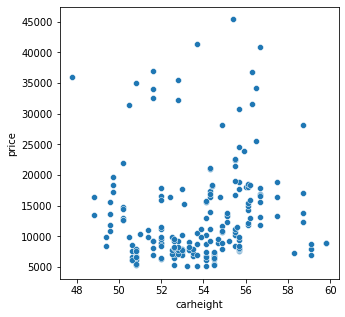

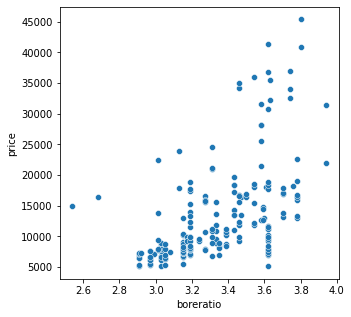

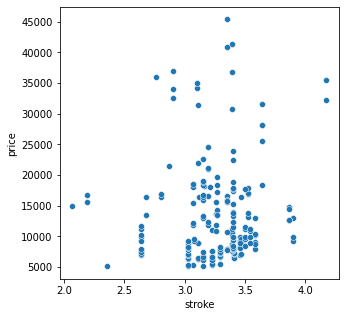

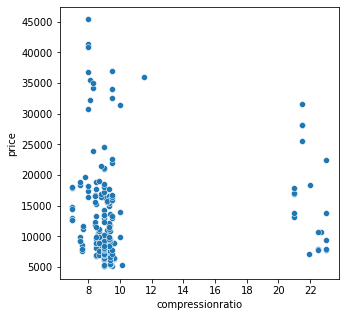

In [8]:
float_variable_df = car_price_data.select_dtypes([np.float64,])
float_varied_cols = float_variable_df.columns
plot_attr_trend(float_variable_df,float_varied_cols,car_price_data["price"])

Inferences from Float Attributes 


*   No clear trend found in WheelBase vs Pricing
*   Car length & width vs Pricing is somewhat positive but outliers present
*   Petrol engines(CR- 7-10) has a lot of price variation nothing conclusive in Price vs (CR,BoreRatio)





In [9]:
## Integer Attributes 
int_attributes = car_price_data.select_dtypes([int])
int_attr_cols = list(int_attributes.columns)
print("int_attr_cols:",int_attr_cols)

int_attr_cols: ['car_ID', 'symboling', 'curbweight', 'enginesize', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


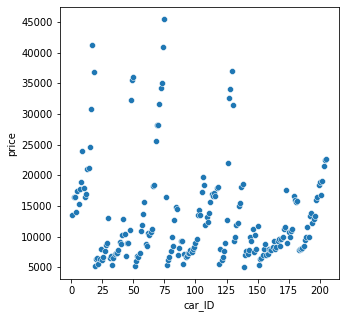

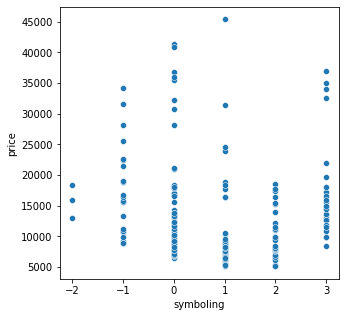

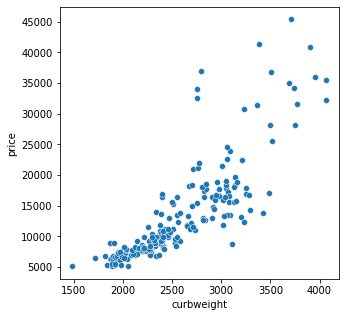

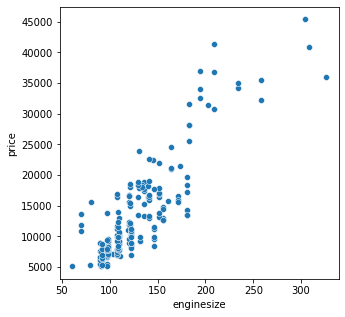

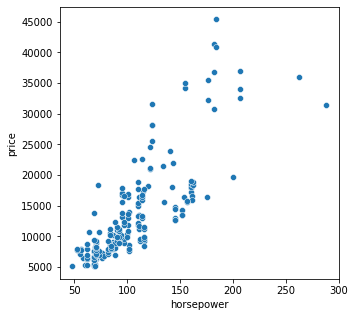

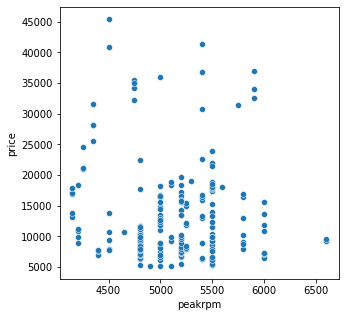

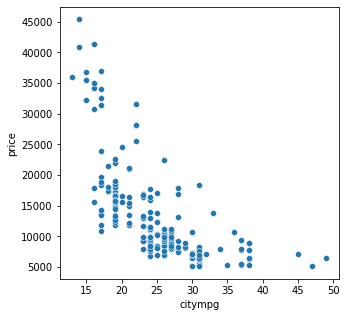

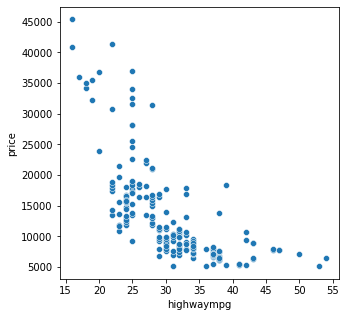

In [10]:
plot_attr_trend(int_attributes,int_attr_cols,car_price_data["price"])

Inference from Integer Attributes

*   HorsePower, Engine size, Curb Weight directly proportional to Pricing
*   City mpg & highway mpg are inversly propotional to pricing 



In [11]:
print(set(list(car_price_data.columns)).difference(int_attr_cols+list(float_varied_cols)))

{'aspiration', 'fueltype', 'CarName', 'cylindernumber', 'doornumber', 'enginelocation', 'enginetype', 'drivewheel', 'fuelsystem', 'carbody'}


In [12]:
cat_df = car_price_data.select_dtypes(object)
cat_df['price'] = car_price_data['price']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [13]:
import plotly.express as px

In [14]:
fig = px.box(cat_df,x='cylindernumber',y='price',points='all')
fig.show()


Inference from Categorical Attributes

*   rwd is slightly priced higher than fwd & 4wd
*   OHCV engines are priced higher than other engine types
*   8>6>5>2>4 in cylinder number vs pricing, data for 12 & 3 is minimal
*   Rear Engines are way to0 expensive  than front engines
*   Keeping fule type optional for now
*   Turbo is priced higher than standard on an avg, Aspiration
*   Door number not having mucj effect on pricing
*   Carbody , sedans are usually expensive than hatchback


*   Catrgorical variables not to be considered : Fuel Type, Door Number














In [39]:
## Attributes to Drop   car_ID,symboling,doornumber,fueltype,carheight,boreratio,stroke,compressionratio,peakrpm
## Dropping Attributes which dont contribute nothing or much to pricing 

cleaned_car_price_data = car_price_data.drop(["car_ID","symboling","doornumber","fueltype","carheight","boreratio","stroke","compressionratio","peakrpm",'price'],axis=1)
cleaned_car_price_data.head()

,CarName,aspiration,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,horsepower,citympg,highwaympg
0,alfa-romero giulia,std,convertible,rwd,front,88.6,168.8,64.1,2548,dohc,four,130,mpfi,111,21,27
1,alfa-romero stelvio,std,convertible,rwd,front,88.6,168.8,64.1,2548,dohc,four,130,mpfi,111,21,27
2,alfa-romero Quadrifoglio,std,hatchback,rwd,front,94.5,171.2,65.5,2823,ohcv,six,152,mpfi,154,19,26
3,audi 100 ls,std,sedan,fwd,front,99.8,176.6,66.2,2337,ohc,four,109,mpfi,102,24,30
4,audi 100ls,std,sedan,4wd,front,99.4,176.6,66.4,2824,ohc,five,136,mpfi,115,18,22


In [16]:
## Data has no missing values
bool_val = cleaned_car_price_data.isnull()
print(bool_val.value_counts())

CarName  aspiration  carbody  drivewheel  enginelocation  wheelbase  carlength  carwidth  curbweight  enginetype  cylindernumber  enginesize  fuelsystem  horsepower  citympg  highwaympg  price
False    False       False    False       False           False      False      False     False       False       False           False       False       False       False    False       False    205
dtype: int64


In [97]:
## Encoding catrgorical data 
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


In [44]:
enc = OrdinalEncoder()

In [45]:
def _encode_categorical_data(df,columns):
  for eCol in columns:
    arr = enc.fit_transform(np.expand_dims(df[eCol],axis=1)).astype(np.int64)
    df[eCol] = arr
  
  return df

In [46]:
columns = list(cleaned_car_price_data.columns)
cleaned_car_price_data = _encode_categorical_data(cleaned_car_price_data,columns)
cleaned_car_price_data.head()

,CarName,aspiration,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,horsepower,citympg,highwaympg
0,2,0,0,2,0,2,22,8,92,0,2,18,5,30,8,10
1,3,0,0,2,0,2,22,8,92,0,2,18,5,30,8,10
2,1,0,2,2,0,10,29,16,115,5,3,28,5,45,6,9
3,4,0,3,1,0,30,45,21,66,3,2,11,5,27,11,13
4,5,0,3,0,0,28,45,23,116,3,1,22,5,33,5,5


In [66]:
x_train,x_test,y_train,y_test = train_test_split(cleaned_car_price_data,car_price_data['price'],test_size=0.2)


In [119]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso,BayesianRidge,SGDRegressor
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor

In [115]:
pipeline = Pipeline([("scaler",StandardScaler()),("model",Ridge())])
fit_obj = pipeline.fit(x_train, y_train)

In [117]:
## Predict Data
y_pred = fit_obj.predict(x_test)
print("y_pred",list(map(lambda x:round(x,1),list(y_pred))))
print("Targets",list(y_test))

y_pred [27457.1, 16486.3, 21050.7, 12489.6, 3211.7, 4646.1, 4456.5, 8687.5, 33729.6, 6688.9, 16523.1, 3446.4, 15247.2, 19130.8, 12821.9, 3836.0, 12078.0, 23978.3, 4655.9, 13458.5, 18265.4, 10548.7, 26957.8, 6119.3, 25592.6, 3960.2, 4968.3, 16930.5, 4732.5, 18535.7, 10743.8, 19328.6, 20403.6, 19359.6, 6919.0, 4443.5, 12386.1, 4807.7, 5942.9, 25735.8, 10309.0]
Targets [28176.0, 14869.0, 17859.167, 15040.0, 6692.0, 7775.0, 6938.0, 11259.0, 37028.0, 8916.5, 12764.0, 6918.0, 18344.0, 16630.0, 11245.0, 7099.0, 10245.0, 23875.0, 6479.0, 18150.0, 16900.0, 13645.0, 25552.0, 7053.0, 36000.0, 7349.0, 7788.0, 22625.0, 7395.0, 15750.0, 11845.0, 16695.0, 17075.0, 12440.0, 8916.5, 7609.0, 15510.0, 9258.0, 8058.0, 31400.5, 6989.0]


In [114]:
fit_obj.score(x_test,y_test)

0.8046273703598213

In [123]:
pipeline = Pipeline([("scaler",StandardScaler()),("model",DecisionTreeRegressor())])
fit_obj_tree = pipeline.fit(x_train, y_train)
y_pred_dectree=fit_obj_tree.predict(x_test)
print("y_pred",list(map(lambda x:round(x,1),list(y_pred_dectree))))
print("Targets",list(y_test))


y_pred [28248.0, 14489.0, 18920.0, 12170.0, 7799.0, 7995.0, 7198.0, 10345.0, 32528.0, 6575.0, 22018.0, 7898.0, 7126.0, 15580.0, 8845.0, 7499.0, 8495.0, 18920.0, 5389.0, 18620.0, 17950.0, 10945.0, 28248.0, 5118.0, 45400.0, 7999.0, 7898.0, 15985.0, 6695.0, 15690.0, 10945.0, 15580.0, 13860.0, 15580.0, 6575.0, 6785.0, 12170.0, 8358.0, 8238.0, 32250.0, 8189.0]
Targets [28176.0, 14869.0, 17859.167, 15040.0, 6692.0, 7775.0, 6938.0, 11259.0, 37028.0, 8916.5, 12764.0, 6918.0, 18344.0, 16630.0, 11245.0, 7099.0, 10245.0, 23875.0, 6479.0, 18150.0, 16900.0, 13645.0, 25552.0, 7053.0, 36000.0, 7349.0, 7788.0, 22625.0, 7395.0, 15750.0, 11845.0, 16695.0, 17075.0, 12440.0, 8916.5, 7609.0, 15510.0, 9258.0, 8058.0, 31400.5, 6989.0]


In [124]:
fit_obj_tree.score(x_test,y_test)

0.8158943742880962

In [126]:
from sklearn.ensemble import AdaBoostRegressor
pipeline = Pipeline([("scaler",StandardScaler()),("model",AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),n_estimators=291))])
#regr=AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),n_estimators=291)
fit_obj = pipeline.fit(x_train,y_train)
y_pred_adaboost=fit_obj.predict(x_test)
print("y_pred",list(map(lambda x:round(x,1),list(y_pred_adaboost))))
print("Targets",list(y_test))
fit_obj.score(x_test,y_test)

y_pred [29922.7, 14934.2, 17462.9, 14128.2, 7256.6, 9419.2, 8433.5, 10918.9, 32805.0, 6556.0, 15411.9, 8523.0, 13037.0, 14167.9, 9391.2, 8292.2, 9384.1, 17866.9, 6357.4, 16483.8, 15793.9, 12075.1, 29755.2, 7827.3, 40960.0, 7670.4, 9069.4, 16672.2, 7350.8, 16494.1, 12134.0, 14485.1, 15742.2, 14485.1, 6556.0, 7940.8, 14584.2, 8561.8, 8370.9, 34028.0, 8895.1]
Targets [28176.0, 14869.0, 17859.167, 15040.0, 6692.0, 7775.0, 6938.0, 11259.0, 37028.0, 8916.5, 12764.0, 6918.0, 18344.0, 16630.0, 11245.0, 7099.0, 10245.0, 23875.0, 6479.0, 18150.0, 16900.0, 13645.0, 25552.0, 7053.0, 36000.0, 7349.0, 7788.0, 22625.0, 7395.0, 15750.0, 11845.0, 16695.0, 17075.0, 12440.0, 8916.5, 7609.0, 15510.0, 9258.0, 8058.0, 31400.5, 6989.0]


0.9104823271764517